# Loading and Exploring Log LAS Files With Python

## Introduction

Log ASCII Standard (LAS) files are a common file format storing and transferring well log data in the oil and gas industry. 

A LAS file is a file format that was developed by the Canadian Well Logging Society and it is used to store log curve data as well as information about the well.

This notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

The well data used in this notebook are from the Maui gas field in Offshore Taranaki Basin, New Zealand

## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
Lasio library is the most popular python library for reading .las files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

To load our file in, use the `.read()` method from LASIO. Here, I will be loading Rahi-1 .las file

In [193]:
las = lasio.read("/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/rahi-1_final.las")

## Loading and Checking Data
In this step we are going to load, check and explore the sections in a typical las file

In [194]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [195]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

Now that our file has been loaded, we can start investigating it's contents especially the header section which contained information about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using Python's f-string we can join the items together.

In [196]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

START DEPTH (STRT): 		 136.0932
STOP DEPTH (STOP): 		 3500.4756
STEP (STEP): 		 0.1524
NULL VALUE (NULL): 		 -999.25
COMPANY (COMP): 		 
WELL (WELL): 		 Rahi-1
FIELD (FLD): 		 
LOCATION (LOC): 		 
COUNTRY (CTRY): 		 
STATE (STAT): 		 
COUNTY (CNTY): 		 
SERVICE COMPANY (SRVC): 		 Shell Todd Oil Services Limited
DATE (DATE): 		 
API NUMBER (API): 		 
UNIQUE WELL ID (UWI): 		 100000223430
LATITUDE (LATI): 		 -39.7164729
LONGITUDE (LONG): 		 173.3434684


In [197]:
las.well.WELL.value

'Rahi-1'

by looping through `las.curves`, we can quickly see and print the log curve mnemonic.

In [198]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
BS
CALI
DENS
DRHO
DTC
GR
NEUT
PEF
RESD
RESD_CORR
RESS
RESS_CORR
SP
TEMP
TENS


To see what curves are present within the las file, we can repeat the process with the Curve Item object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.

In [199]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: BS, 	 Units: IN, 	 Description: Bit Size (Created in Geolog)
Curve: CALI, 	 Units: IN, 	 Description: Caliper Log (CALI) and High resolution Caliper (HCAL)
Curve: DENS, 	 Units: G/C3, 	 Description: Compensated Formation Density Log (RHOB) and (RHOZ)
Curve: DRHO, 	 Units: G/C3, 	 Description: Density Log Correction (DRHO) and Density Log Correction High Res (HDRA)
Curve: DTC, 	 Units: US/F, 	 Description: Delta T (DT)
Curve: GR, 	 Units: GAPI, 	 Description: Environmentally corrected GR log. (ECGR) and Gamma-Ray Log (GR)
Curve: NEUT, 	 Units: V/V, 	 Description: Neutron Porosity (env. corrected and Apha Processed) (NPOR)
Curve: PEF, 	 Units: B/E, 	 Description: Photoelectric Factor (PEF) and (PEFZ)
Curve: RESD, 	 Units: OHMM, 	 Description: Laterolog Deep Resistivity (HLLD) and (LLD)
Curve: RESD_CORR, 	 Units: OHMM, 	 Description: Borehole corrected LLD
Curve: RESS, 	 Units: OHMM, 	 Description: High Res Shallow Laterolog (HLLS) and Shal

We can easily be removed the curves we don't need from the LAS file by using the 'las.delete_curve'.

In [200]:
las.delete_curve('RESD_CORR')

In [201]:
las.delete_curve('RESS_CORR')

In [202]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: BS, 	 Units: IN, 	 Description: Bit Size (Created in Geolog)
Curve: CALI, 	 Units: IN, 	 Description: Caliper Log (CALI) and High resolution Caliper (HCAL)
Curve: DENS, 	 Units: G/C3, 	 Description: Compensated Formation Density Log (RHOB) and (RHOZ)
Curve: DRHO, 	 Units: G/C3, 	 Description: Density Log Correction (DRHO) and Density Log Correction High Res (HDRA)
Curve: DTC, 	 Units: US/F, 	 Description: Delta T (DT)
Curve: GR, 	 Units: GAPI, 	 Description: Environmentally corrected GR log. (ECGR) and Gamma-Ray Log (GR)
Curve: NEUT, 	 Units: V/V, 	 Description: Neutron Porosity (env. corrected and Apha Processed) (NPOR)
Curve: PEF, 	 Units: B/E, 	 Description: Photoelectric Factor (PEF) and (PEFZ)
Curve: RESD, 	 Units: OHMM, 	 Description: Laterolog Deep Resistivity (HLLD) and (LLD)
Curve: RESS, 	 Units: OHMM, 	 Description: High Res Shallow Laterolog (HLLS) and Shallow Laterolog (HLLS)
Curve: SP, 	 Units: MV, 	 Description: Spontaneous

In [203]:
las.write('/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/rahi-1_final.las')

## Converting LAS File to a Pandas Dataframe
LASIO file can be converted to a pandas dataframe using the .df() function.This allow machine learning algorithm

In [204]:
well = las.df()

The `.head()` function generates a table view of the header and the first 5 rows within the dataframe.

In [205]:
well.head()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,SP,TEMP,TENS
DEPTH,,,,,,,,,,,,,
136.0932,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6257,1052.5375
136.2456,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6382,1044.8145
136.3980,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6507,1037.0916
136.5504,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6615,1041.8923
136.7028,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.6688,1072.0391


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [206]:
well.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESS,SP,TEMP,TENS
count,22077.000000,12047.000000,15771.000000,12034.000000,12014.000000,16076.000000,16083.000000,12021.000000,12015.000000,12008.000000,15994.000000,22064.000000,22027.000000
mean,12.943905,10.996209,2.577082,0.013383,93.209797,75.999882,0.297473,3.082521,16.522742,5.928948,-161.847994,63.628516,1743.857836
std,4.019454,1.725533,0.317035,0.025637,15.795433,22.943707,0.240110,0.458740,496.124632,37.745832,16.773844,17.750963,301.865769
min,8.500000,8.163700,1.270800,-0.027854,41.216300,22.076900,-0.014900,0.925500,0.944400,0.752400,-188.793100,30.625700,1037.091600
25%,12.250000,8.666350,2.355000,0.004472,80.587800,55.538000,0.258300,2.860300,1.736600,1.544550,-176.654725,48.664050,1555.794850
50%,12.250000,12.069100,2.449700,0.008771,92.372550,82.591700,0.307500,3.102900,2.365300,2.199750,-161.910700,58.266550,1795.905800
75%,16.000000,12.178850,2.626850,0.014006,102.666350,96.107200,0.351500,3.283600,3.905700,3.777700,-150.612975,78.208450,1989.200350
max,36.000000,15.598700,3.123600,0.482754,155.844400,163.397600,18.054100,7.412200,31096.597700,1632.735600,-105.289100,101.136900,2498.848400


In [207]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 22077 entries, 136.0932 to 3500.4756
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      22077 non-null  float64
 1   CALI    12047 non-null  float64
 2   DENS    15771 non-null  float64
 3   DRHO    12034 non-null  float64
 4   DTC     12014 non-null  float64
 5   GR      16076 non-null  float64
 6   NEUT    16083 non-null  float64
 7   PEF     12021 non-null  float64
 8   RESD    12015 non-null  float64
 9   RESS    12008 non-null  float64
 10  SP      15994 non-null  float64
 11  TEMP    22064 non-null  float64
 12  TENS    22027 non-null  float64
dtypes: float64(13)
memory usage: 2.4 MB


### Quick Plot

Using the ploting function within pandas, we can plot all curves on a single plot.

<AxesSubplot:xlabel='DEPTH'>

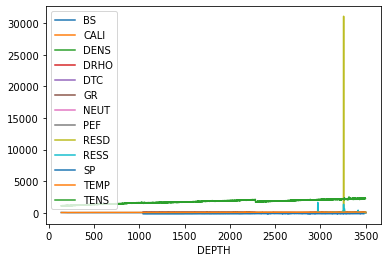

In [208]:
well.plot()

When we look at the plot above, we can see that is not very useful to us as all logging measurements have their own scales.

Lets plot individual curves by supplying a y variable argument like so:

<AxesSubplot:xlabel='DEPTH'>

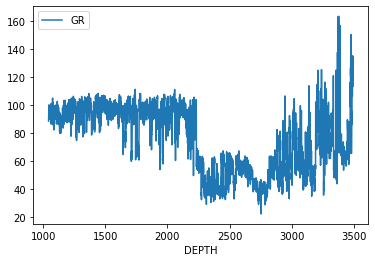

In [209]:
well.plot(y='GR')

This allows us to view the Gamma Ray Curve on its own. We can change the variable to any other curve within the dataframe and view it as follows: 

<AxesSubplot:xlabel='DEPTH'>

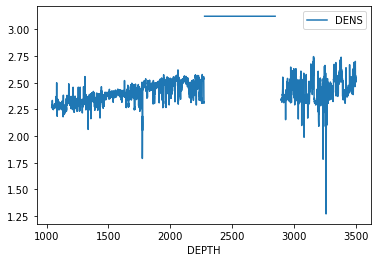

In [210]:
well.plot(y='DENS')

<AxesSubplot:xlabel='DEPTH'>

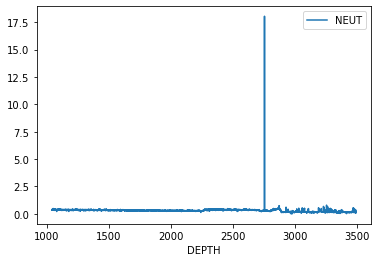

In [211]:
well.plot(y='NEUT')

<AxesSubplot:xlabel='DEPTH'>

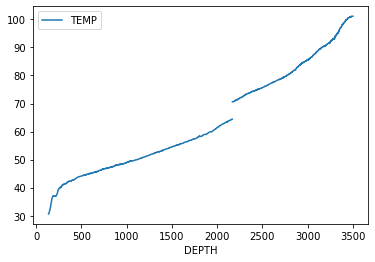

In [212]:
well.plot(y='TEMP')

<AxesSubplot:xlabel='DEPTH'>

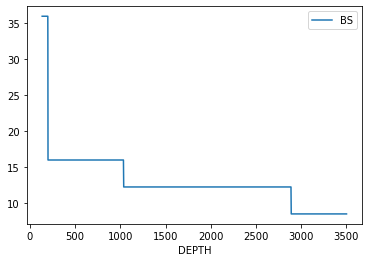

In [213]:
well.plot(y='BS')

<AxesSubplot:xlabel='DEPTH'>

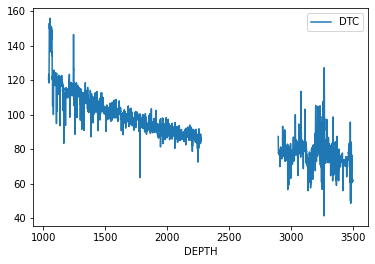

In [214]:
well.plot(y='DTC')

<AxesSubplot:xlabel='DEPTH'>

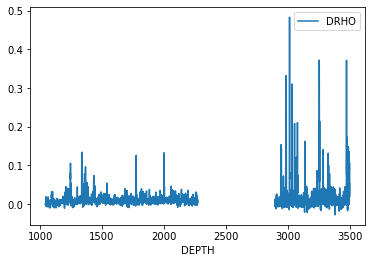

In [215]:
well.plot(y='DRHO')